In [1]:
import atoti as tt
import pandas as pd

Welcome to Atoti 0.9.4!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


## Load Data

In [2]:
data = pd.read_csv('tutorial/data/us-counties-2023.csv')
data

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0
...,...,...,...,...,...,...
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0


## Preprocessing Data

### Menangani Missing Value

In [3]:
data.isnull().sum()

date         0
county       0
state        0
fips      2986
cases        0
deaths    6396
dtype: int64

In [4]:
data["deaths"] = data["deaths"].fillna(0)
data["fips"] = data["fips"].fillna(0)

In [5]:
data.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

### Mengubah Format Kolom

In [6]:
data.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths    float64
dtype: object

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['date']

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
267004   2023-03-23
267005   2023-03-23
267006   2023-03-23
267007   2023-03-23
267008   2023-03-23
Name: date, Length: 267009, dtype: datetime64[ns]

In [8]:
data.dtypes

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths           float64
dtype: object

In [62]:
data

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961,230.0
1,2023-01-01,Baldwin,Alabama,1003.0,67496,719.0
2,2023-01-01,Barbour,Alabama,1005.0,7027,111.0
3,2023-01-01,Bibb,Alabama,1007.0,7692,108.0
4,2023-01-01,Blount,Alabama,1009.0,17731,260.0
...,...,...,...,...,...,...
267004,2023-03-23,Sweetwater,Wyoming,56037.0,12519,139.0
267005,2023-03-23,Teton,Wyoming,56039.0,12150,16.0
267006,2023-03-23,Uinta,Wyoming,56041.0,6416,43.0
267007,2023-03-23,Washakie,Wyoming,56043.0,2700,51.0


## Membuat Cube

In [9]:
session = tt.Session.start()

In [10]:
df = session.read_pandas(data,
                      table_name="Covid",
                      data_types={
                                'date': tt.type.LOCAL_DATE_TIME,
                                'county': tt.type.STRING,
                                'state': tt.type.STRING,
                                'fips': tt.type.FLOAT,
                                'cases': tt.type.FLOAT,
                                'deaths': tt.type.FLOAT})

In [11]:
df.head()

,date,county,state,fips,cases,deaths
0,2023-01-01,Autauga,Alabama,1001.0,18961.0,230.0
1,2023-01-01,Covington,Alabama,1039.0,11250.0,266.0
2,2023-01-01,Monroe,Alabama,1099.0,6355.0,104.0
3,2023-01-01,Bristol Bay plus Lake and Peninsula,Alaska,2997.0,1215.0,1.0
4,2023-01-01,Franklin,Arkansas,5047.0,4422.0,80.0


In [12]:
cube = session.create_cube(df)

## Membuat Level

In [13]:
l = cube.levels
l

{('Covid', 'county', 'county'): <atoti.level.Level object at 0x00000157ECBB9FD0>, ('Covid', 'state', 'state'): <atoti.level.Level object at 0x00000157C89AABA0>, ('Covid', 'date', 'date'): <atoti.level.Level object at 0x00000157C89AAAE0>}

## Membuat Hierarchy

In [14]:
h = cube.hierarchies
h

{('Covid', 'county'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBBBB00>, ('Covid', 'state'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBB8500>, ('Covid', 'date'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBBA660>}

### Membuat Hierarchy Date Baru

In [15]:
cube.create_date_hierarchy('Date', column = df['date'], 
                           levels = {'Year': 'yyyy', 'Month': 'MMM', 'Day': 'dd'},)

In [16]:
h

{('Covid', 'county'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBBB2F0>, ('Covid', 'state'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBB9EE0>, ('Covid', 'date'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBBB1A0>, ('Covid', 'Date'): <atoti.hierarchy.Hierarchy object at 0x00000157ECBBB620>}

## Buat Measure

In [17]:
m = cube.measures
m

{'cases.MEAN': <atoti.measure.Measure object at 0x00000157ECBED310>, 'contributors.COUNT': <atoti.measure.Measure object at 0x00000157ECBEC2F0>, 'fips.SUM': <atoti.measure.Measure object at 0x00000157ECBEC980>, 'cases.SUM': <atoti.measure.Measure object at 0x00000157ECBEF800>, 'deaths.SUM': <atoti.measure.Measure object at 0x00000157ECBEDFA0>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x00000157ECBED220>, 'fips.MEAN': <atoti.measure.Measure object at 0x00000157ECBEE660>, 'deaths.MEAN': <atoti.measure.Measure object at 0x00000157ECBEF140>}

### Menampilkan Total Kasus

In [18]:
cube.measures["Total Cases"] = tt.agg.sum(session.tables["Covid"]["cases"])

In [19]:
cube.query(m["Total Cases"])

,Total Cases
0,"8,401,361,920.00"


### Menampilkan Rata-Rata Kasus

In [20]:
cube.query(m["cases.MEAN"])

,cases.MEAN
0,"31,464.73"


In [21]:
cube.query(m["cases.MEAN"],levels=[l["state"]])

,cases.MEAN
state,
Alabama,"24,185.86"
Alaska,"10,906.58"
American Samoa,"8,303.23"
Arizona,"160,884.84"
Arkansas,"13,146.72"
California,"207,284.47"
Colorado,"27,261.27"
Connecticut,"107,607.57"
Delaware,"81,952.67"


### Buat Measure Baru (Death Rate)

In [22]:
m["Death Rate"] = m["deaths.SUM"] / m["cases.SUM"]
m["Death Rate"].formatter = "DOUBLE[##0.00%]"

In [23]:
cube.query(m["cases.SUM"])

,cases.SUM
0,"8,401,361,920.00"


In [24]:
cube.query(m["Death Rate"], levels=[l["state"]])

,Death Rate
state,
Alabama,1.32%
Alaska,0.47%
American Samoa,0.41%
Arizona,1.36%
Arkansas,1.29%
California,0.85%
Colorado,0.80%
Connecticut,1.24%
Delaware,1.00%


## Pertanyaan 

### 1. Menampilkan 10 Country dengan Jumlah Kasus Terbanyak

In [25]:
m["Jumlah Kasus"]= tt.agg.sum(df["cases"])

In [26]:
cube.query(
    m["Jumlah Kasus"],
    levels=[l["county"]]).sort_values("Jumlah Kasus", ascending=False).head(10)

,Jumlah Kasus
county,
Los Angeles,302274304.0
New York City,263458096.0
Miami-Dade,125056352.0
Cook,124707912.0
Maricopa,123621280.0
Orange,120144160.0
Harris,104499344.0
Jefferson,95263120.0
San Diego,86790392.0


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
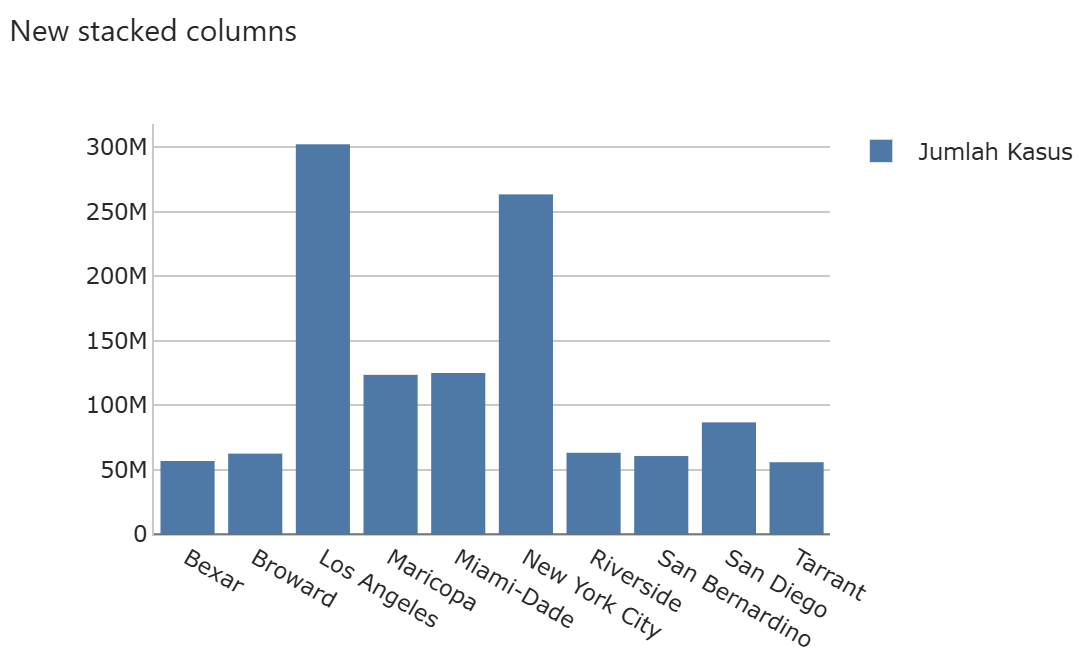

In [27]:
session.widget

### 2. Menampilkan 10 State dengan Death Rate Tertinggi

In [28]:
cube.query(
    m["Death Rate"],
    levels=[l["state"]],
).sort_values("Death Rate", ascending=False).head(10)

,Death Rate
state,
Pennsylvania,0.014316
Georgia,0.013752
Michigan,0.013748
Arizona,0.013608
Nevada,0.013577
Mississippi,0.013561
New Mexico,0.013493
Missouri,0.013353
Alabama,0.013199


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
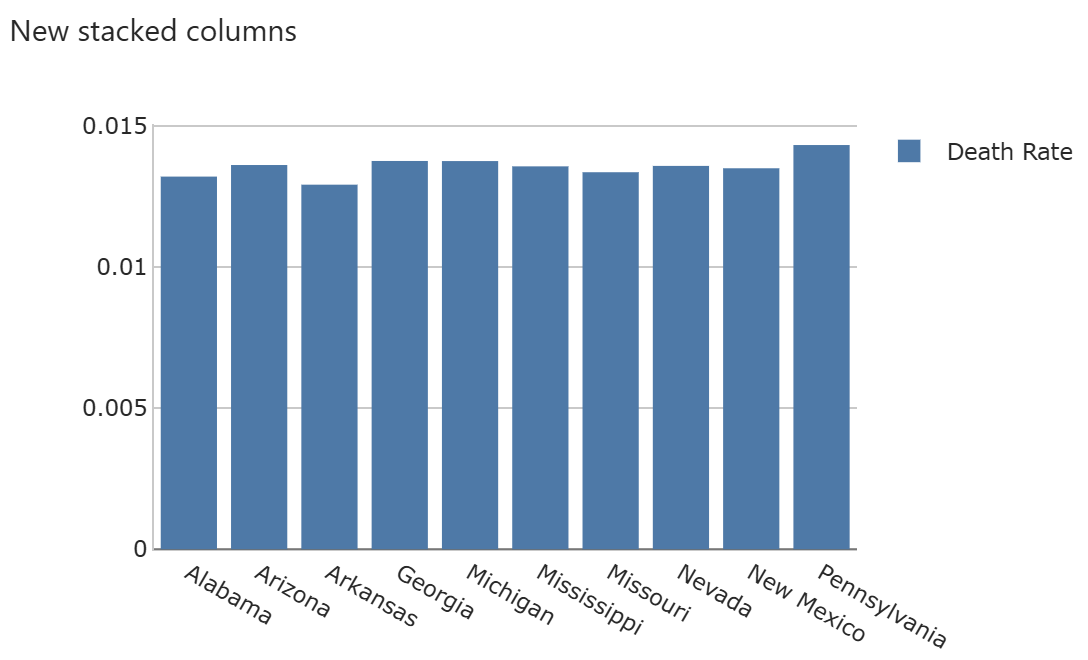

In [29]:
session.widget

### 3. Menampilkan 5 Country di Pennsylvania dengan Death Rate Tertinggi

In [152]:
cube.query(
    m["Death Rate"],
    levels=[l["state"], l["county"]],
    filter=l["state"] == "Pennsylvania"
).sort_values("Death Rate", ascending=False).head(5)

Death Rate
state        county               
Pennsylvania Juniata      0.033746
             Sullivan     0.027794
             Potter       0.026404
             Warren       0.024957
             Jefferson    0.023805

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
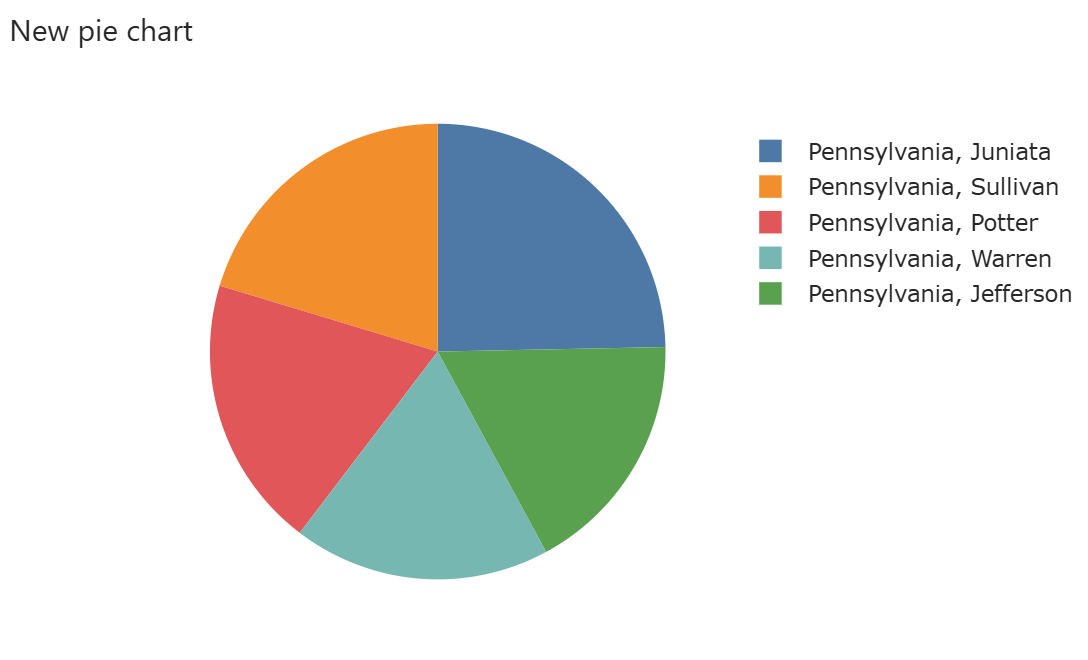

In [31]:
session.widget

### 4. Jumlah Kasus dan Kematian Setiap Harinya

In [32]:
m["Jumlah Kematian"]= tt.agg.sum(df["deaths"])

In [33]:
cube.query(
    m["Jumlah Kasus"],
    m["Jumlah Kematian"],
    levels=[l["Day"]])

Jumlah Kasus Jumlah Kematian
Year Month Day                                
2023 Feb   01   102,179,896.00    1,115,974.00
           02   102,249,376.00    1,116,666.00
           03   102,311,872.00    1,117,828.00
           04   102,314,768.00    1,117,837.00
           05   102,317,488.00    1,117,837.00
...                        ...             ...
     Mar   19   103,784,960.00    1,133,827.00
           20   103,794,768.00    1,133,965.00
           21   103,813,136.00    1,134,178.00
           22   103,864,936.00    1,134,914.00
           23   103,910,088.00    1,135,344.00

[82 rows x 2 columns]

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
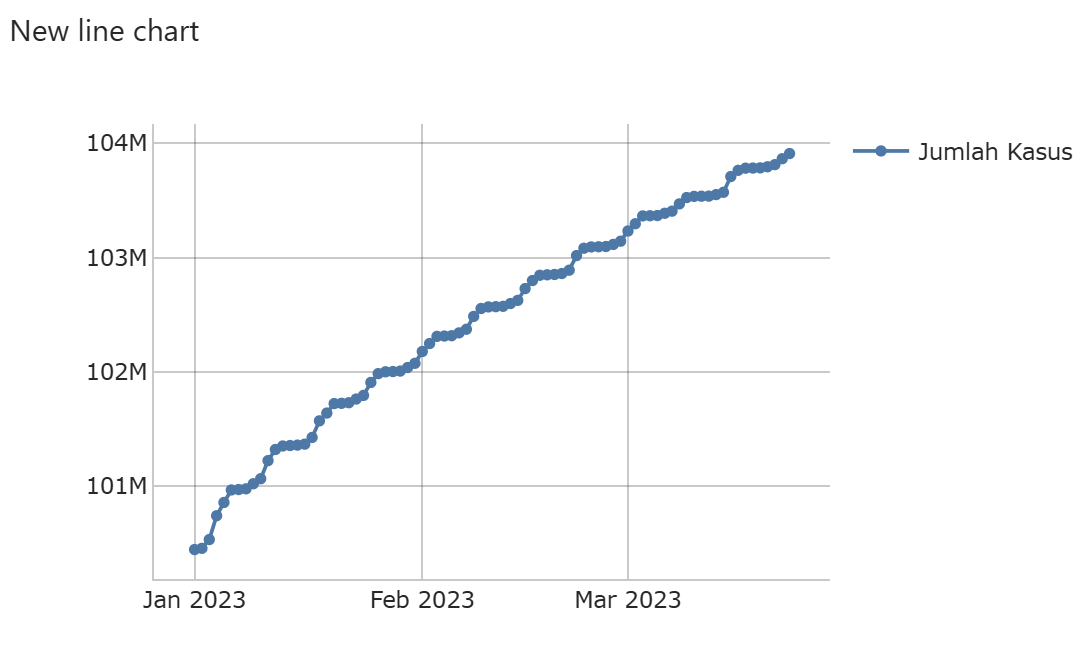

In [34]:
session.widget

### 5. Jumlah yang Selamat di Setiap State

In [35]:
m["Total Survivors"]= tt.agg.sum(df["cases"]) - tt.agg.sum(df["deaths"])

In [63]:
cube.query(
    m["Total Survivors"],
    levels=[l["state"]]).sort_values("Total Survivors", ascending=False).head(1)

,Total Survivors
state,
California,977420224.0


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
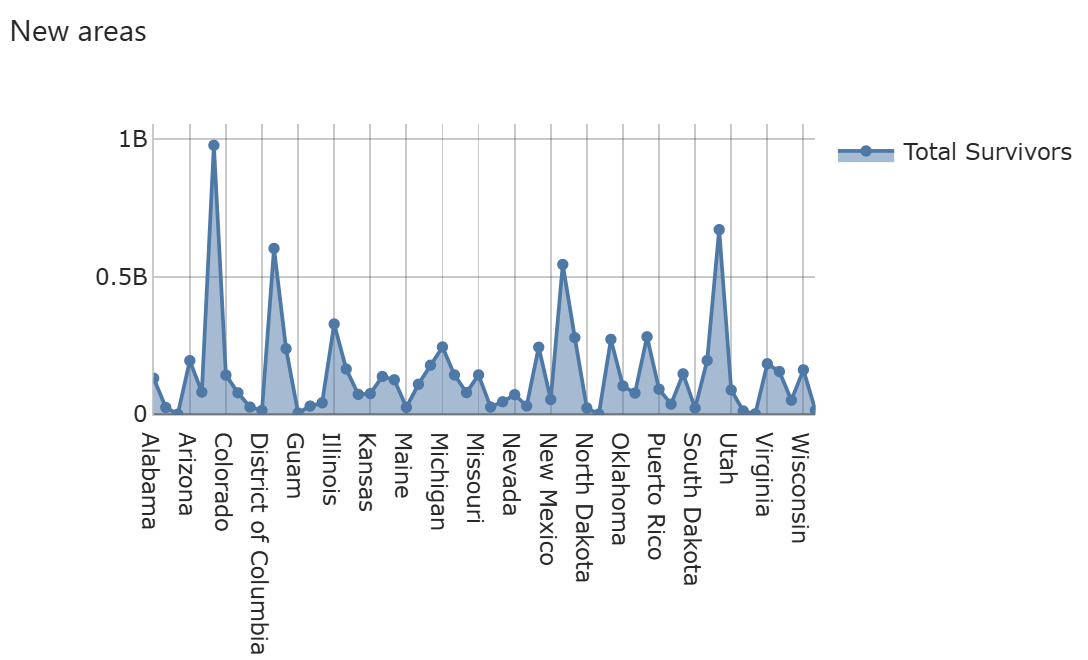

In [37]:
session.widget

### 6. Perbandingan Jumlah Kasus di Texas pada Rentang Bulan Jan-Mar

In [38]:
cube.query(
    m["Jumlah Kasus"],
    levels=[l["state"],l["Month"]],
    filter=l["state"]=="Texas")

Jumlah Kasus
state Year Month                
Texas 2023 Feb    232,141,600.00
           Jan    253,895,456.00
           Mar    192,775,872.00

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
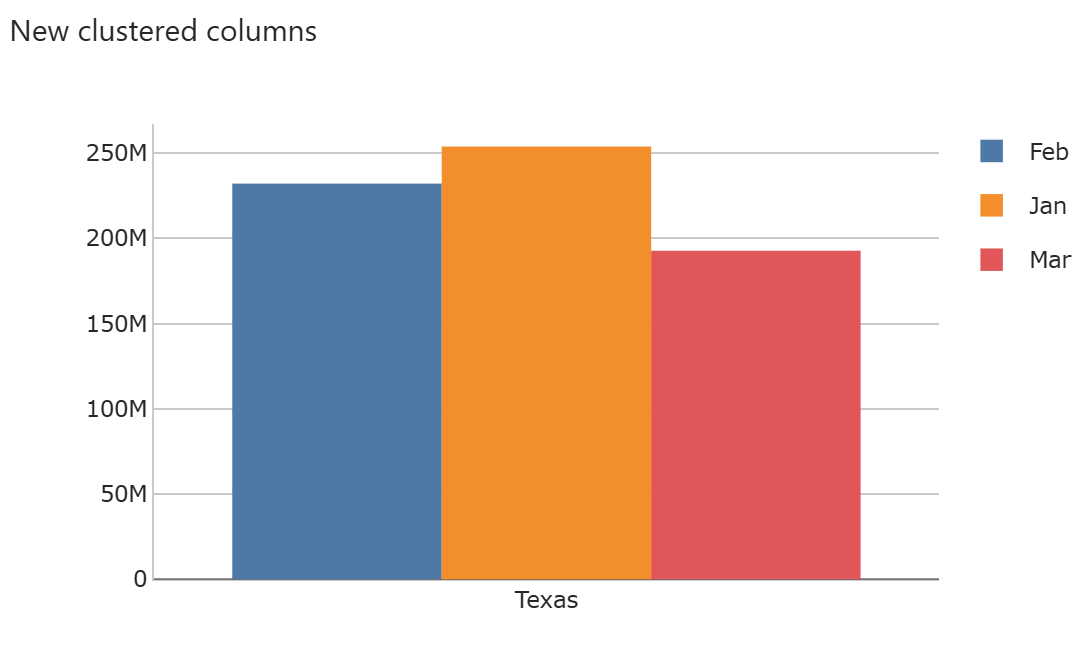

In [39]:
session.widget

### 7. Kenaikan Jumlah Kasus di 5 Country dengan Jumlah Kasus Terbanyak di New York

In [40]:
top5 = cube.query(
    m["Jumlah Kasus"],
    levels=[l["county"]],
    filter=l["state"] == "New York"
).sort_values("Jumlah Kasus", ascending= False).head(5)

top5

,Jumlah Kasus
county,
New York City,263458096.0
Suffolk,46383000.0
Nassau,44834256.0
Westchester,27363364.0
Erie,21998716.0


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
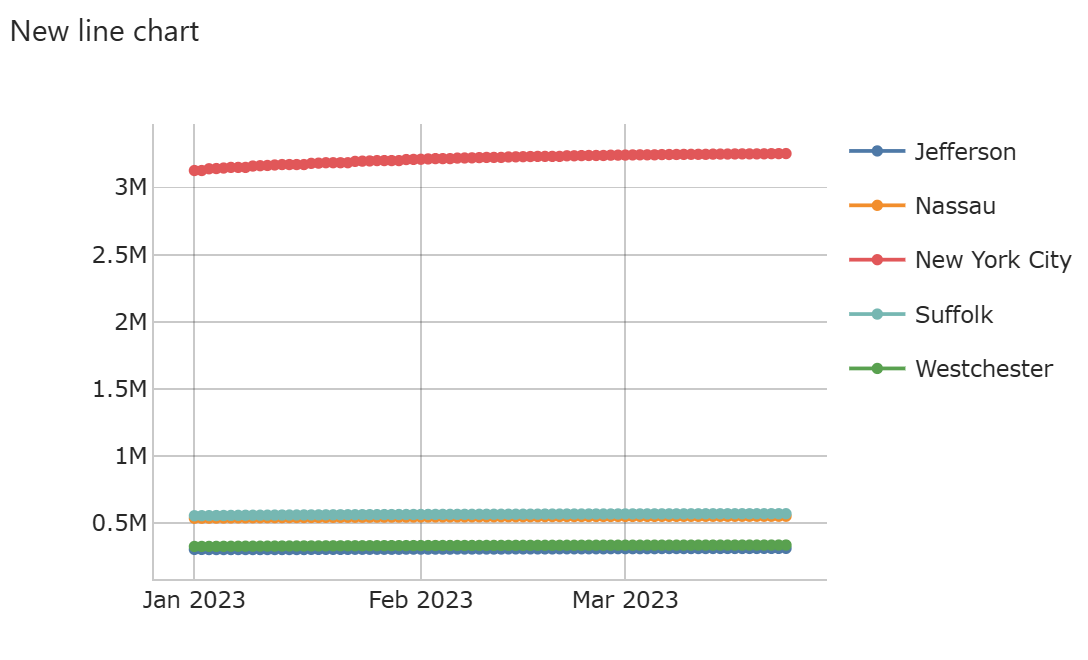

In [41]:
session.widget

### Challenge

In [153]:
deathrate = cube.query(
    m["Death Rate"],
    include_totals=False,
    levels=[l["state"], l["county"]]
)

deathrate_2_state = deathrate.loc[["Pennsylvania", "California"]]

top5_per_state = (
    rata_2_state
    .groupby("state", group_keys=False)
    .apply(lambda df: df.nlargest(5, "Death Rate"))
)
top5_per_state

Death Rate
state        county               
California   Modoc        0.018903
             Trinity      0.015489
             Shasta       0.015479
             Calaveras    0.014545
             Siskiyou      0.01401
Pennsylvania Juniata      0.033746
             Sullivan     0.027794
             Potter       0.026404
             Warren       0.024957
             Jefferson    0.023805

In [59]:
cube.query(m["Jumlah Kasus"], levels=[l["state"]]).sort_values("Jumlah Kasus", ascending= False).head(1)

,Jumlah Kasus
state,
California,985844928.0
